In [ ]:
!pip install scipy pandas numpy matplotlib scikit-learn fsspec huggingface_hub

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as lm

# Load the data
df = pd.read_csv("hf://datasets/hugginglearners/data-science-job-salaries/ds_salaries.csv")

In [32]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


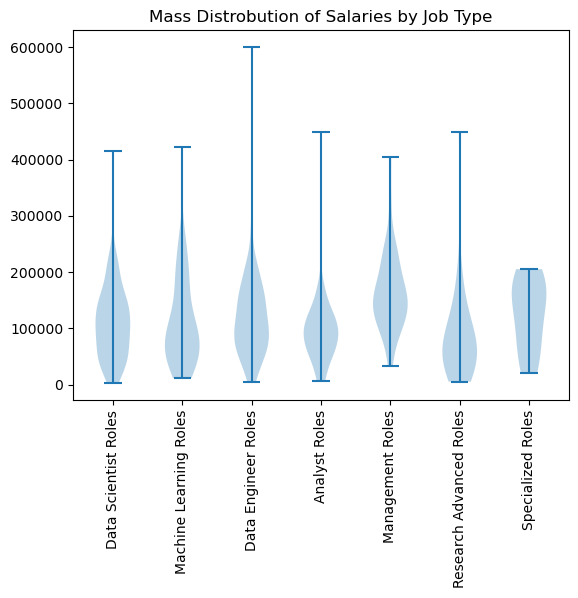

In [9]:
# 4 Job Title Analysis
job_df = df[['job_title', 'salary_in_usd']]


jobs = {}

jobs['Data Scientist Roles'] = ['Data Scientist', 'Principal Data Scientist', 'Staff Data Scientist', 'Applied Data Scientist', 'Data Science Engineer', 'Lead Data Scientist', 'Data Science Consultant']
jobs['Data Engineer Roles'] = ['Data Engineer', 'Lead Data Engineer', 'Principal Data Engineer', 'Big Data Engineer', 'Cloud Data Engineer', 'Data Engineering Manager', 'ETL Developer', 'Data Architect', 'Big Data Architect']
jobs['Machine Learning Roles'] = ['Machine Learning Engineer', 'Applied Machine Learning Scientist', 'ML Engineer', 'Machine Learning Scientist', 'Machine Learning Developer', 'Machine Learning Infrastructure Engineer', 'Lead Machine Learning Engineer', 'NLP Engineer', 'Machine Learning Manager', 'Head of Machine Learning']
jobs['Analyst Roles'] = ['Data Analyst','Principal Data Analyst','Finance Data Analyst', 'Business Data Analyst', 'BI Data Analyst', 'Lead Data Analyst', 'Financial Data Analyst', 'Product Data Analyst', 'Marketing Data Analyst']
jobs['Management Roles'] = ['Data Science Manager', 'Data Analytics Manager', 'Director of Data Science', 'Head of Data', 'Head of Data Science', 'Director of Data Engineering', 'Data Engineering Manager', 'Machine Learning Manager', 'Data Analytics Lead']
jobs['Research Advanced Roles'] = ['Research Scientist', 'AI Scientist', '3D Computer Vision Researcher', 'Computer Vision Engineer', 'Computer Vision Software Engineer']
jobs['Specialized Roles'] = ['Data Specialist', 'Data Analytics Engineer', 'Analytics Engineer', 'Financial Data Analyst']



# replace job titles with categories
flag = False
job_title = "none"
for row in job_df.itertuples():
    for key, value in jobs.items():
        job_title = row.job_title
        if row.job_title in value:
            job_df.at[row.Index, 'job_title'] = key
            break


# Group salaries by job titles
job_titles = job_df['job_title'].unique()
job_df = [job_df[job_df['job_title'] == title]['salary_in_usd'] for title in job_titles]
plt.violinplot(job_df)
plt.xticks(ticks=range(1, len(job_titles) + 1), labels=job_titles, rotation=90)
plt.title('Mass Distrobution of Salaries by Job Type')
plt.show()
